In [2]:
from nltk.tokenize.casual import casual_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import re
import pandas as pd
import string
import os
from timeit import default_timer as timer

input_filepath="../../data/clean/"
pd.set_option('display.max_rows', 150)
filename="trisma2016_cleaned_text_by_lga.csv"

In [3]:
tweetdf=pd.read_csv(os.path.join(input_filepath, filename),header=0, keep_default_na=False)
docs = tweetdf[['lga','cleaned']]
docs.columns = ['LGA','cleaned']
docs

,LGA,cleaned
0,Albury,#2015bestnine #bestofnine2015 #byebye #2015 #h...
1,Armidale Regional,tranquility in the park moore park inn boutiqu...
2,Ballina,happy new year to all my pals back home in the...
3,Balranald,crackin night on the river just posted photo o...
4,Bathurst Regional,happy new year to you your fam as well miss mi...
5,Bayside,wtf is maths circus sounds like it must've bee...
6,Bega Valley,suns out guns out coffee time #crossfitgirls #...
7,Bellingen,more from the promised lands #normanheywood #l...
8,Berrigan,hottt appreciate your hotness monique it's 201...
9,Blacktown,ahhh tumblr currently have hammock in the livi...


In [4]:
# Set up Vectorizer for use with pre-cleaned and tokenized data
from nltk.stem import PorterStemmer
ps = PorterStemmer()

def smc_tokeniser(doc):
    #return doc.split(' ')
    return [ps.stem(w) for w in doc.split(' ')]

tfidf = TfidfVectorizer(
    analyzer='word',
    tokenizer=smc_tokeniser,
    ngram_range=(1,3),
    max_features=5000,
    stop_words='english',
    token_pattern=None)  

In [41]:
tfidf_vectors = tfidf.fit_transform(docs['cleaned'])
print(len(tfidf.vocabulary_))

features = np.array(tfidf.get_feature_names())
print('Number of features', len(features))


5000
Number of features 5000


In [42]:
def top_tfidf_feats(row, features, top_n=25):
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

#Return top features amongst documents in rows indentified by indices in grp_ids
def top_mean_feats(tfs, features, grp_ids=None, min_tfidf=0.1, top_n=25):
    if grp_ids:
        D = tfs[grp_ids].toarray()
    else:
        D = tfs.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

In [43]:
top_features = top_mean_feats(tfidf_vectors,features, top_n=500)
top_features

,feature,tfidf
0,thi,0.105091
1,2016,0.103526
2,nsw,0.092024
3,#nswrf,0.069519
4,just,0.047086
5,#nswfire,0.045175
6,wa,0.042719
7,like,0.035575
8,advic,0.030746
9,it',0.029091


In [5]:
target_df = pd.read_csv(input_filepath+"cleaned_target.csv")
target_df = target_df[(target_df["Type"]=='Rate per 100,000 population') & (target_df['Year'] == 2016)].dropna()
target_df = target_df[['LGA', 'Assault - domestic violence', 'Assault - non-domestic violence', 'Fraud', 
                             'Sexual Offences', 'Malicious damage to property', 'Prohibited weapons offences']]
target_df = target_df[['LGA']].join(np.log(target_df[target_df.columns[1:]])).reset_index(drop=True)
target_df

,LGA,Assault - domestic violence,Assault - non-domestic violence,Fraud,Sexual Offences,Malicious damage to property,Prohibited weapons offences
0,Albury,6.299733,6.334338,6.263887,5.378146,7.181636,5.756704
1,Armidale Regional,6.217540,6.481927,6.734923,5.398352,7.703918,5.659568
2,Ballina,5.544054,5.772687,6.223344,5.042361,6.678706,5.027093
3,Bathurst Regional,6.084028,6.136396,6.531605,5.300932,7.076881,5.422629
4,Bayside,5.755702,5.613635,6.590862,4.448712,6.371043,4.687338
5,Bega Valley,5.743838,5.833989,5.762531,5.031643,6.697170,5.031643
6,Bellingen,5.632005,5.574846,5.514222,4.756536,6.405194,4.533393
7,Berrigan,5.164719,4.941576,5.095726,4.402579,6.551014,5.634723
8,Blacktown,6.387513,6.116154,6.710620,5.099780,6.888318,5.002186
9,Bland,5.852780,5.752696,5.641471,5.373207,6.614920,5.943752


In [6]:
# Only keep docs for target LGAs:
docs = docs.merge(target_df[['LGA']], on='LGA')
docs

,LGA,cleaned
0,Albury,#2015bestnine #bestofnine2015 #byebye #2015 #h...
1,Armidale Regional,tranquility in the park moore park inn boutiqu...
2,Ballina,happy new year to all my pals back home in the...
3,Bathurst Regional,happy new year to you your fam as well miss mi...
4,Bayside,wtf is maths circus sounds like it must've bee...
5,Bega Valley,suns out guns out coffee time #crossfitgirls #...
6,Bellingen,more from the promised lands #normanheywood #l...
7,Berrigan,hottt appreciate your hotness monique it's 201...
8,Blacktown,ahhh tumblr currently have hammock in the livi...
9,Bland,weethalle #farm #country #rural #reddirt #suns...


In [7]:
from collections import defaultdict
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

# X must be a dataframe whose last column is vector of text docs
# y must be a dataframe with one or more label columns, and last column of target.
# The first columns of y will be used as labels to return results.
def tfidf_cv(X, y, max_features=None, folds=5, n_important=10):
    assert len(X) == len(y)
    
    if not max_features:
        max_features = len(y)
    # Empty dataframe for predictions
    preds = pd.DataFrame(columns = y.columns)
    preds['predicted'] = 0
    importants = defaultdict(float)
    kf = KFold(n_splits=folds, shuffle=True)
    for train_index, test_index in kf.split(X):
        X_train_df, X_test_df = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train_df, y_test_df = y.iloc[train_index,:], y.iloc[test_index,:].copy()
        
        # Fit tfidf model for train:
        tfidf = TfidfVectorizer(analyzer='word',tokenizer=smc_tokeniser,ngram_range=(1,3),
                            max_features=max_features,stop_words='english',token_pattern=None)  
        X_train = tfidf.fit_transform(X_train_df.iloc[:,-1])
        X_test = tfidf.transform(X_test_df.iloc[:,-1])
        features = np.array(tfidf.get_feature_names())
        
        model = RandomForestRegressor(random_state=42)
        model.fit(X_train, y_train_df.iloc[:,-1])
        
        # Save important features
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        for f in range(len(indices)):
            importants[features[indices[f]]] += importances[indices[f]] / folds

        # Save predictions
        y_test_df['predicted'] = model.predict(X_test)
        preds = pd.concat([preds,y_test_df])
        
        print('Finished processing',len(preds),'records...')

    return preds, importants

In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

def tfidf_metrics(predictions, importants):
    print('MOST IMPORTANT FEATURES:')
    for w in sorted(importants, key=importants.get, reverse=True)[0:20]:
      print(w, importants[w])

    r2 = r2_score(predictions.iloc[:,-2],predictions.iloc[:,-1])
    rmse = np.sqrt(mean_squared_error(predictions.iloc[:,-2],predictions.iloc[:,-1]))
    print('R2:',r2)
    print('RMSE:',rmse)

    y = predictions.iloc[:,-2]
    pred = predictions.iloc[:,-1                   ]
    fig, ax = plt.subplots()
    ax.scatter(y, pred, edgecolors=(0, 0, 0))
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    plt.show()    

Try increasing max features to test the boundaries of where overfitting begins...

In [53]:
start = timer()
predictions, importants = tfidf_cv(docs, target_df[['LGA','Assault - domestic violence']], max_features=500, folds=5)
end = timer()
print('Finished TF-IDF 5 fold cross validation in',end-start,'seconds')

[ 0.09494324  0.08352707  0.07298193  0.04827698  0.03462761  0.03146865
  0.02962113  0.02905656  0.02722894  0.01846285]
[ 0.08015902  0.0733568   0.0690383   0.06658882  0.05004731  0.04338098
  0.04261051  0.04227671  0.04116092  0.02738133]
[ 0.14838855  0.10565109  0.05737445  0.04632275  0.03360336  0.02909096
  0.02513812  0.02367094  0.02227884  0.01936951]
[ 0.1122587   0.10304592  0.0793506   0.06166351  0.04867965  0.04706712
  0.03999694  0.01968092  0.01895612  0.01732333]
[ 0.07194822  0.04906841  0.04679638  0.04676066  0.04558781  0.03973175
  0.03681612  0.03549559  0.03545196  0.03542396]
Finished TF-IDF 5 fold cross validation in 933.3115049088374 seconds


MOST IMPORTANT FEATURES:
sydney 0.0814681280996
#sydney 0.0717625781284
st 0.0491011610702
sep 0.0454090655352
nsw 0.0354049132694
sunday 0.0145963862918
#australia 0.0145633500034
#nsw 0.0118825336196
mountain 0.0117699962694
#grassfir 0.0100094618608
video 0.00981368138623
advic grass 0.00965539621201
look like 0.00941342357154
hard 0.00935927522489
clear 0.00935213214129
weekend 0.00852210274361
nov 2016 0.00845534185939
#nswrf 0.00823218381144
#grassfir #nswfire 0.00799938862271
close 0.00736322412187
R2: 0.146586592161
RMSE: 0.575870566207


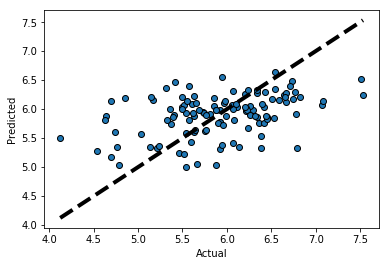

In [54]:
tfidf_metrics(predictions, importants)

Max features 200 is superior so we will stick with that. Now run an analysis on all 6 target variables:

Assault - domestic violence
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 1018.503854349954 seconds
MOST IMPORTANT FEATURES:
sydney 0.216155586459
team 0.0389415089528
nov 2016 0.0285854085081
dec 2016 0.0279260608722
grass 0.0177723889731
beach 0.0168086640237
sure 0.016356395572
point 0.0163219040372
weekend 0.015185758509
pleas 0.0151724081882
❤ 0.0150176143519
nsw 0.0148962116354
morn 0.0140578094536
hi 0.01281619514
beauti 0.0120816095345
man 0.0118068918926
love 0.0114294066327
south 0.0111669102011
hope 0.0109443961098
right 0.0109328075314
R2: 0.052777586446
RMSE: 0.606696002829


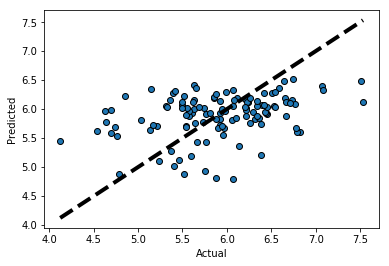

Assault - non-domestic violence
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 995.9921035289299 seconds
MOST IMPORTANT FEATURES:
sydney 0.177004179957
#bushfir #nswfire 0.041025380434
nsw 0.0211874701945
park 0.0172833601106
grass 0.0172159806353
nice 0.0169001553087
south 0.0156953737984
beach 0.0141737666288
dec 2016 0.0132551082467
rd 0.0132133228622
new south wale 0.0128679150862
rain today 0.0127713398684
wind 0.0126053061921
ani 0.0122162073771
weekend 0.0121060724918
game 0.01139411731
❤ 0.0113671920108
new 0.0109130814112
point 0.0107400990786
😍 0.0101091580848
R2: 0.00619484888546
RMSE: 0.553090885228


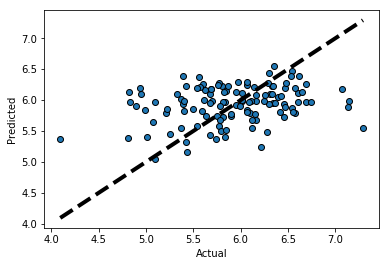

Fraud
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 1003.5895793579984 seconds
MOST IMPORTANT FEATURES:
becaus 0.0604207475208
tonight 0.0301692422256
lol 0.0301317695887
man 0.0278490902108
right 0.0264227551269
you'r 0.0251436600241
rd 0.0229445406821
#nswrf 0.022400206636
don't 0.0214423471689
work 0.0211373047395
need 0.0210361808418
say 0.0193349356727
head 0.0190807873259
use 0.0169390968829
valley 0.0144605465145
veri 0.0143304292462
sydney 0.0138179073366
peopl 0.0134470363637
oh 0.0131699265454
park 0.0128151736855
R2: 0.238179325422
RMSE: 0.441316643282


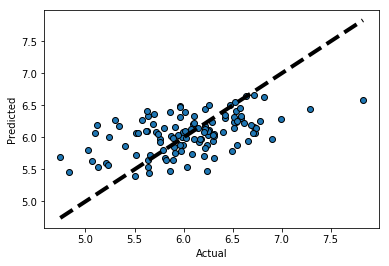

Sexual Offences
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 1002.5598470238037 seconds
MOST IMPORTANT FEATURES:
sydney 0.270216350047
nov 2016 0.0877534375791
point 0.033432728703
park 0.0327201981733
oct 2016 0.0219208968717
beach 0.0217154120616
morn 0.0196919676452
nsw 0.0163556086173
beauti 0.0158085378113
amaz 0.0138337902018
tonight 0.0116571687467
#auspol 0.0115332048576
#nswfire 0.0114907937966
photo 0.0114817748593
life 0.0113117112769
big 0.010170460937
#nswfire advic 0.00997961014516
come 0.00952323970151
temperatur 0.00889196275958
valley 0.00793672116916
R2: 0.226928632188
RMSE: 0.449103704055


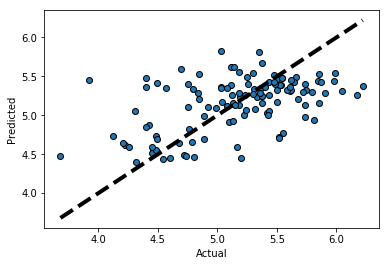

Malicious damage to property
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 949.9995119730011 seconds
MOST IMPORTANT FEATURES:
sydney 0.256803553697
nov 2016 0.0383709536144
#bushfir #nswfire 0.0218008361849
dec 2016 0.0204626337951
nsw 0.0173260079792
grass 0.01698990259
beauti 0.0164146435872
team 0.0160465385437
way 0.0157717877309
morn 0.0150049984722
oh 0.0143889673965
dec 0.0138599732376
love 0.0134295678532
❤ 0.0129263572695
#nswrf 0.0121327612856
friend 0.0118526072909
win 0.0100033182206
beach 0.00914067284443
nice 0.00909434372713
#bushfir 0.00894545365492
R2: 0.209052771183
RMSE: 0.463805229147


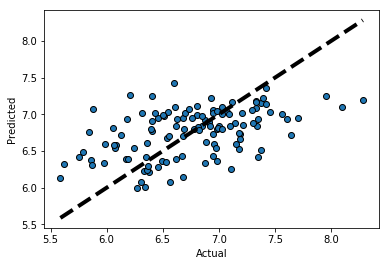

Prohibited weapons offences
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 919.0390529250726 seconds
MOST IMPORTANT FEATURES:
sydney 0.318174738518
nov 2016 0.0778373540773
#nswrf 0.0640373021772
#grassfir 0.0270196563304
park 0.0269979142397
beach 0.0236284670782
grass 0.0152169423086
nsw 0.0146701571372
nov 0.0128628694824
i'v 0.0127774155721
new south 0.0124965290989
wind 0.00999030683943
😍 0.00983224972965
oh 0.00880439208894
temperatur 0.00871177106083
work 0.00837033869669
you'r 0.0082873674928
❤ 0.00778811864969
beauti 0.00767476926788
bay 0.00736771227595
R2: 0.428436207068
RMSE: 0.587610484543


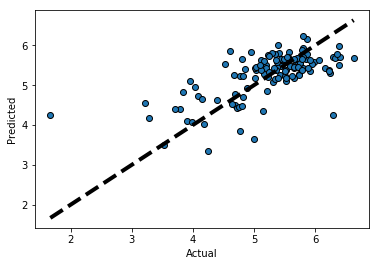

In [24]:
tfidf_output = pd.DataFrame()
for target in target_df.columns[1:]:
    print(target)
    start = timer()
    preds, importants = tfidf_cv(docs, target_df[['LGA',target]], max_features=200, folds=5)
    end = timer()
    print('Finished TF-IDF 5 fold cross validation in',end-start,'seconds')
    tfidf_metrics(preds, importants)
    if len(tfidf_output.columns) == 0:
        tfidf_output['LGA'] = preds['LGA']
    tfidf_output['TF-IDF '+target] = preds[preds.columns[-1]]

In [25]:
tfidf_output.to_csv("../../data/clean/tfidf_by_lga_2016_predictions.csv",index=False)

In [14]:
d = {'a': ['a','b','b'],
    'u':  [1,2,3],
    'y': [4,5,5],
    'p': [4,7,8]}
test = pd.DataFrame(data=d)
test = test[['a','u','y','p']].groupby(['a']).agg({'y': lambda x: np.mean(x),
                                                    'p': lambda x: np.mean(x)}).reset_index()
test

,a,y,p
0,a,4,4.0
1,b,5,7.5


In [16]:
df = pd.DataFrame()
df

""
